In [31]:
from torch.utils.data import Dataset
import torch
import numpy as np
import h5py
import pytorch_lightning as pl
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/code')

import torch
import json
from torch.utils.data import DataLoader
import os

def load_model_data(SAVEPATH):
    for filename in os.listdir(SAVEPATH+"checkpoints"):
        f = os.path.join(SAVEPATH, filename)
        FILENAME = "checkpoints/"+filename
    config = json.load(open(SAVEPATH+'config.json'))
    print(SAVEPATH+FILENAME)
    checkpoint = torch.load(SAVEPATH+FILENAME, map_location=torch.device('cpu'))
    
    ''' Model setup '''
    wrapers = __import__("wrappers.wrapers", fromlist=['object'])#.wrapers
    model = getattr(wrapers, config["MODEL_WRAPER"])(config)
    # print(model)
    model.load_state_dict(checkpoint['state_dict'])
    ld = __import__("load_data")
    data_set = getattr(ld, config["DATA_LOADER"])(config, data_type = "insulating")
    
    f = h5py.File(config["PATH_TRAIN"], 'r')
    # parameters = f["valid"]["parameters"]
    return model, data_set#, parameters

SAVEPATH = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/U2c0_b30.0_metiso_1/save_auto_encoder_BS10_2024-07-02/insulating/"
model, validation = load_model_data(SAVEPATH)
model.model.eval()
random_sample = int(np.random.rand()*len(validation))
pred_ae_1 = model.model(torch.tensor(validation[random_sample][0])[None])
# print(pred_ae_1.shape)
# print(validation[random_sample][1])

/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/U2c0_b30.0_metiso_1/save_auto_encoder_BS10_2024-07-02/metallic/checkpoints/epoch=199-step=57000.ckpt


/tmp/ipykernel_560208/1376780526.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred_ae_1 = model.model(torch.tensor(validation[random_sample][0])[None])


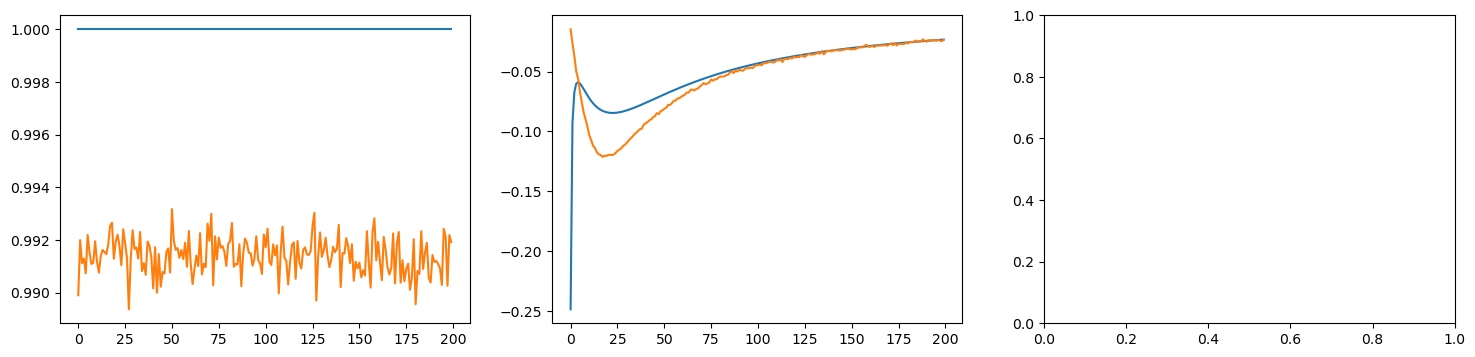

In [32]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,4))

fign = 0
ax[fign].plot(validation[random_sample][1][:200])
ax[fign].plot(pred_ae_1.detach().numpy()[0][:200])

fign = 1
ax[fign].plot(validation[random_sample][1][200:])
ax[fign].plot(pred_ae_1.detach().numpy()[0][200:])
